In [4]:
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
Df=pd.read_csv("../data/FingerPrint_lt50.csv",sep='\t',index_col=0)

In [7]:
Df.head()

Formula  Ones_1  Ones_2  Ones_3    Ones_4   Ones_5    Ones_6    Ones_7  \
0   Nb1 Ag1 O3    -1.0    -1.0    -1.0 -1.000000 -1.00000 -1.000000 -1.000000   
1   Li2 Ag6 O4    -1.0    -1.0    -1.0 -1.000000 -1.00000 -1.000000 -1.000000   
2  Cs2 Ag2 Cl4    -1.0    -1.0    -1.0 -1.000000 -1.00000 -1.000000 -1.000000   
3   Ag2 Hg1 I4    -1.0    -1.0    -1.0 -1.000000 -1.00000 -1.000000 -1.000000   
4    Ag2 C2 O6    -1.0    -1.0    -1.0 -0.999999 -0.99997 -0.999462 -0.993801   

     Ones_8    Ones_9    ...       Chi_91    Chi_92    Chi_93    Chi_94  \
0 -1.000000 -1.000000    ...    -0.497277 -0.453894 -0.191895  0.064329   
1 -1.000000 -0.999999    ...    -0.120349 -0.206105 -0.217994 -0.183563   
2 -1.000000 -1.000000    ...     0.259454  0.218056  0.031980 -0.098497   
3 -1.000000 -1.000000    ...    -0.059718 -0.141794 -0.241085 -0.272397   
4 -0.954192 -0.782973    ...    -0.123078 -0.202793 -0.201147 -0.164696   

     Chi_95    Chi_96    Chi_97    Chi_98    Chi_99   Chi_100  
0  0.104619 -0.118050 -0.394161 -0.537855 -0.587967 -0.654697  
1 -0.075639  0.073079  0.137550  0.062229 -0.112490 -0.359644  
2 -0.054451  0.137466  0.285717  0.202032 -0.097068 -0.462973  
3 -0.160438  0.054698  0.275458  0.446003  0.474980  0.227803  
4 -0.108094  0.009786  0.153578  0.153906 -0.070010 -0.394319  

[5 rows x 301 columns]

In [8]:
Formulas=Df["Formula"].values
Formulas

array(['Nb1 Ag1 O3', 'Li2 Ag6 O4', 'Cs2 Ag2 Cl4', ..., 'Y6 Co6 O18',
       'Y1 Co1 F5', 'Mg1 Co4 S8'], dtype=object)

In [9]:
Fingerprints=Df.drop("Formula",axis=1).values

In [15]:
from sklearn.metrics import euclidean_distances

# Dont execute this block

In [10]:
from sklearn.cluster import KMeans

In [11]:
Km1=KMeans(n_clusters=15)

In [12]:
clusts=Km1.fit_predict(Fingerprints)

In [13]:
from collections import Counter
print Counter(clusts).values()

[1502, 1049, 683, 934, 455, 291, 2211, 1147, 1380, 97, 1554, 555, 838, 1470, 556]


In [ ]:
inertia_array=np.zeros(19)
for i in range(2,20):
    Km_run=KMeans(n_clusters=i)
    Km_run.fit_predict(Fingerprints)
    inertia_array[i-2]=Km_run.inertia_

    

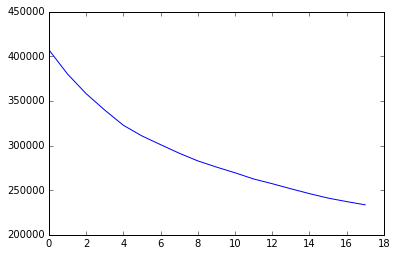

In [27]:
plt.plot(inertia_array[0:-1])

In [30]:
inertia_array2=np.zeros(6)
for i in tqdm.tqdm_notebook(range(20,26)):
    Km_run=KMeans(n_clusters=i)
    Km_run.fit_predict(Fingerprints)
    inertia_array2[i-20]=Km_run.inertia_


In [32]:
inertia_array=np.append(inertia_array,inertia_array2)

In [41]:
inertia_array=inertia_array[inertia_array>0]

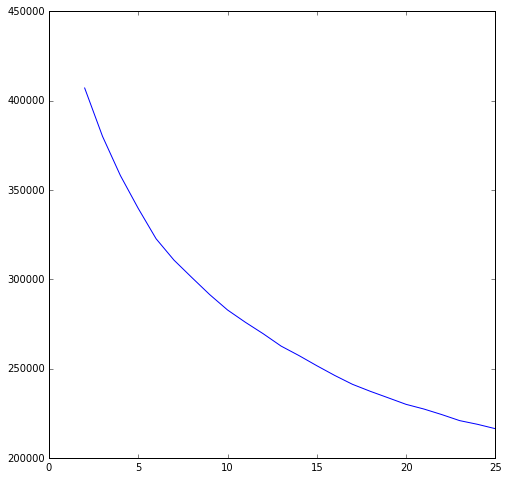

In [42]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(2,26),inertia_array)

# Start Execution Again

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pc=PCA(n_components=50)

In [11]:
pca_fing=pc.fit_transform(Fingerprints)

In [10]:
list(enumerate(np.cumsum(pc.explained_variance_ratio_)))

[(0, 0.16149118125330231),
 (1, 0.27367676124440887),
 (2, 0.37250488053590131),
 (3, 0.44928486557661768),
 (4, 0.50712061537192721),
 (5, 0.54981904927756264),
 (6, 0.5853508611030771),
 (7, 0.6199933456382144),
 (8, 0.65102686933536513),
 (9, 0.68001285644235121),
 (10, 0.70764070985117467),
 (11, 0.73034622458312459),
 (12, 0.7499285382066283),
 (13, 0.76809153805162245),
 (14, 0.78435923367535199),
 (15, 0.79901524025260173),
 (16, 0.81279379573299504),
 (17, 0.82483369075007018),
 (18, 0.83574923304734461),
 (19, 0.84572638458306681),
 (20, 0.8541211132340204),
 (21, 0.86218460989479784),
 (22, 0.86988930772944628),
 (23, 0.87697220787494989),
 (24, 0.88343686872852345),
 (25, 0.88968751572190052),
 (26, 0.89574043598524988),
 (27, 0.90158254950196837),
 (28, 0.90718878573617356),
 (29, 0.91206621481073447),
 (30, 0.91678640751493468),
 (31, 0.92125512084878669),
 (32, 0.92520925187091885),
 (33, 0.92894818633254295),
 (34, 0.93261969138669665),
 (35, 0.93603947790603437),
 (36, 

In [12]:
Km_pca50=KMeans(n_clusters=15,random_state=42)

In [13]:
clusts=Km_pca50.fit_predict(pca_fing)


In [59]:
labels=[Formulas[clusts==i][0] for i in sorted(set(clusts))]
list(enumerate(labels))

[(0, 'Er2 Ag2 Te4'),
 (1, 'Ag2 Ru2 O8'),
 (2, 'Y2 Ag2 Te4'),
 (3, 'Li2 Ag1 Sb1'),
 (4, 'Ag2 C2 O6'),
 (5, 'Ce2 Ag2 Ge2'),
 (6, 'Li2 Ag6 O4'),
 (7, 'Ag4 Ru4 O12'),
 (8, 'Nb1 Ag1 O3'),
 (9, 'Mn2 Ag2 O6'),
 (10, 'Ag1 Bi1 S2'),
 (11, 'Li1 Ag1 Te1'),
 (12, 'Cs2 Ag2 Cl4'),
 (13, 'Ca2 Ag2 Bi2'),
 (14, 'Rb2 Ag2 O4')]

In [14]:
rst=np.random.RandomState(42)
c_arr=[tuple(rst.uniform(0,1,3)) for i in range(15)]


<IPython.core.display.Javascript object>


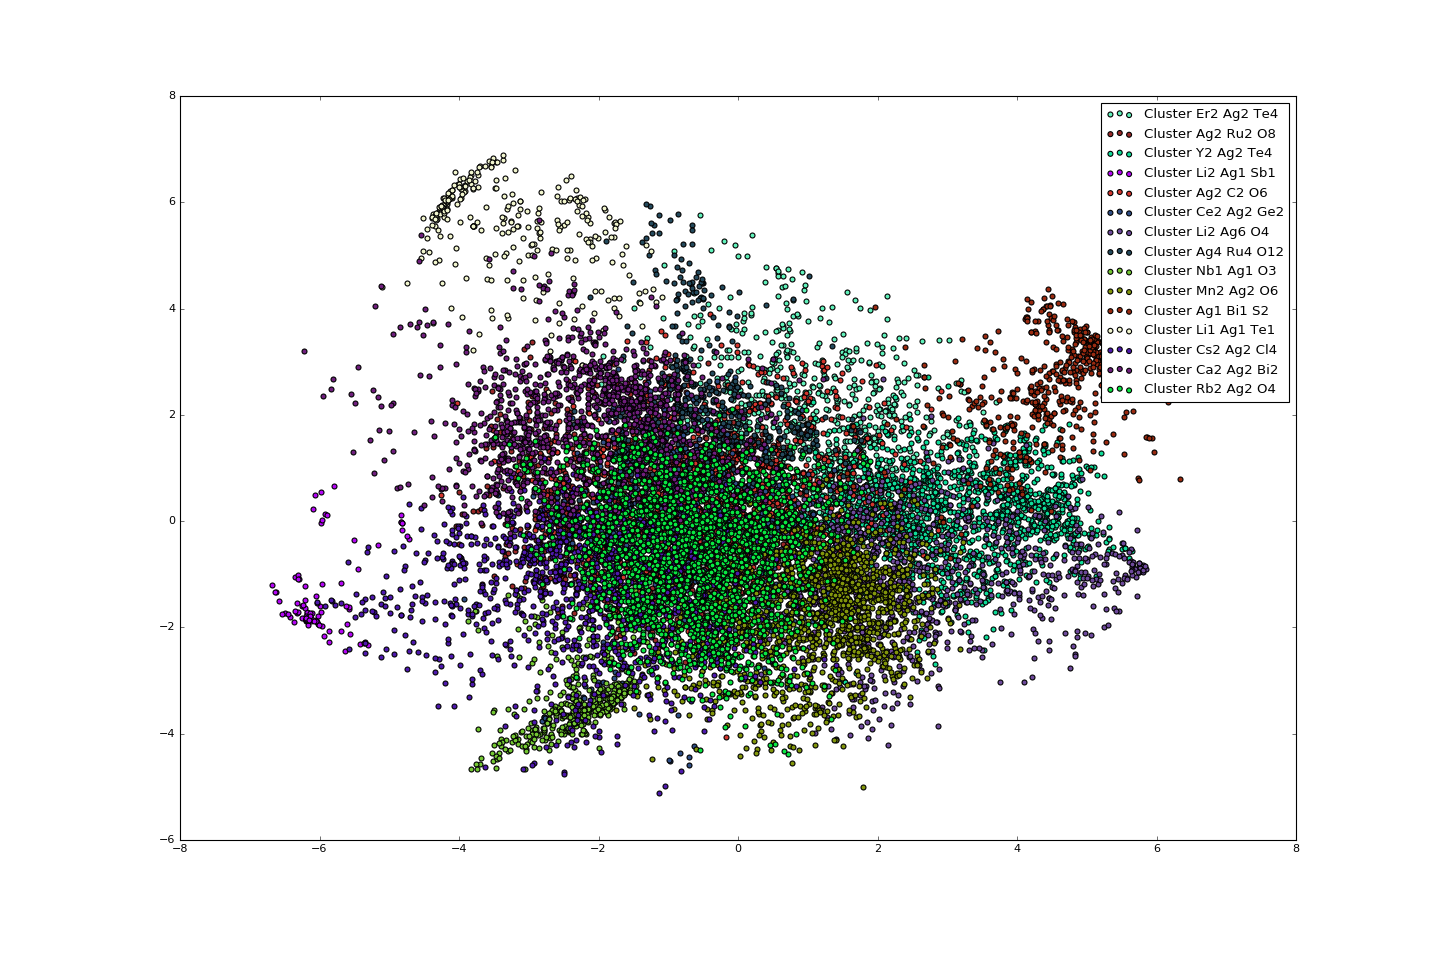

In [76]:
plt.figure(figsize=(18,12))
for i in range(15):
    plt.scatter(pca_fing[clusts==i,0],pca_fing[clusts==i,1],c=c_arr[i],label="Cluster "+labels[i])
plt.legend()

<IPython.core.display.Javascript object>


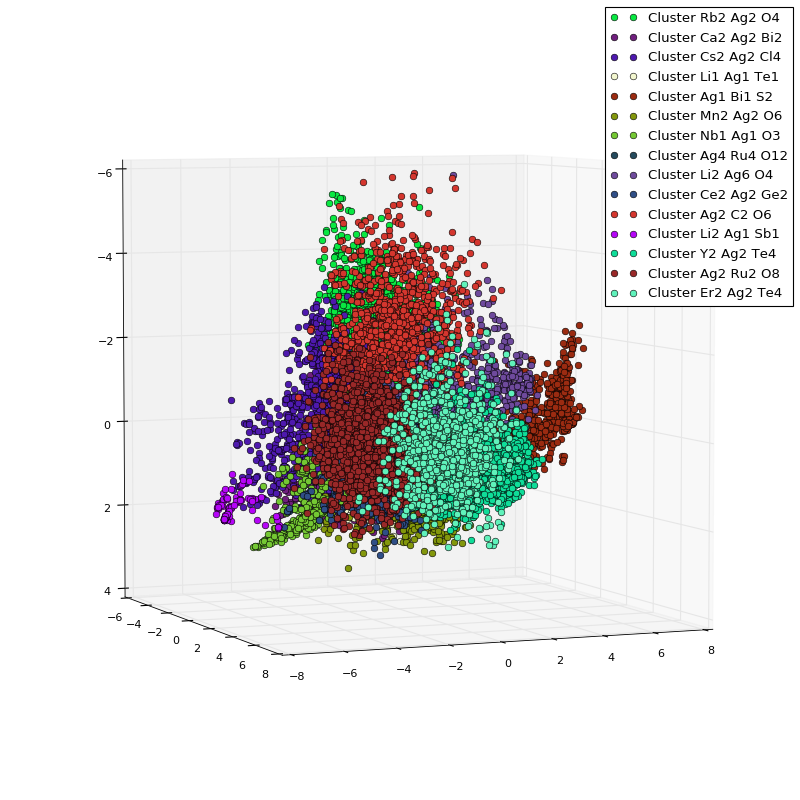

In [74]:
%matplotlib notebook
import mpl_toolkits.mplot3d.axes3d as p3
# Plot result
fig = plt.figure(figsize=(10,10))
ax = p3.Axes3D(fig)
#ax.view_init(7, -80)
for i in range(14,-1,-1):
    ax.plot3D(pca_fing[clusts==i,0],pca_fing[clusts==i,1],pca_fing[clusts==i,3],'o',c=c_arr[i],label="Cluster "+labels[i])
#plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time)
plt.legend()

In [16]:
from collections import Counter
Counter(clusts)

Counter({0: 938,
         1: 1728,
         2: 1507,
         3: 97,
         4: 891,
         5: 777,
         6: 998,
         7: 550,
         8: 491,
         9: 1505,
         10: 492,
         11: 283,
         12: 1204,
         13: 1212,
         14: 2049})

In [17]:
Df["cluster_pca50"]=clusts

In [19]:
Df.ix[0]["cluster_pca50"]

8

In [20]:
perov_clust_forms=Df[Df["cluster_pca50"]==Df.ix[0]["cluster_pca50"]]["Formula"]

In [21]:
perov_clust_forms

0          Nb1 Ag1 O3
32          Ag1 B1 O3
33         Zn1 Ag1 F3
86        Cs2 Ag2 Cl6
108       Tl1 Ag1 Cl3
132        Ni1 Ag1 F3
173        Rb1 Ag1 O3
208        Mg1 Ag1 F3
230       Tl2 Ag2 Cl6
231        K2 Ag2 Cl6
240       Tl1 Ag1 Br3
241       Rb1 Ag1 Br3
246        Ta2 Ag2 O6
256        Cu2 Ag2 F6
257        Mg2 Ag2 F6
262        Cu1 Ag1 F3
269        Rb2 Ag2 F6
272        Cs2 Ag2 F6
308        K4 Ag4 F12
332       Cs1 Ag1 Br3
342       Rb1 Ag1 Cl3
343        K1 Ag1 Cl3
407        Al1 Ag1 O3
413         Y1 Ag1 O3
429        Tl1 Ag1 F3
445        K1 Ag1 Br3
485        Sr1 Ag1 O3
504        La1 Al1 O3
505        La2 Al2 O6
512        Al1 Bi1 O3
             ...     
13883    Mn4 Tl4 Cl12
13947     Tl1 Ge1 Cl3
13950     Cs1 Tm1 Cl3
13967     Rb2 In2 Cl6
13968     Tl1 In1 Cl3
14003    Rb6 Mg6 Cl18
14030     Tl1 Cu1 Cl3
14041    Cs9 Hg9 Cl27
14053     Rb1 Sn1 Cl3
14067     Li1 Ti1 Cl3
14075    Rb4 Mg4 Cl12
14103      K1 Ge1 Cl3
14134     Rb1 Pb1 Cl3
14195      K1 Cr1 Cl3
14196     

In [16]:
dist_centers=euclidean_distances(Km_pca50.cluster_centers_)

[  0.           3.93535105   3.90032104  11.7278847    4.79061938
   4.34218444   4.00873426   4.74158359   7.58895776   4.24982168
   6.47418226   7.54039307   5.19884462   4.48322222   4.32923034]


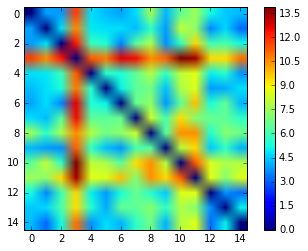

In [17]:
print dist_centers[0]
plt.imshow(dist_centers)
plt.colorbar()

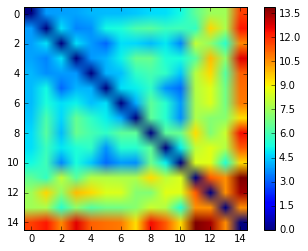

In [18]:
clust_centers=Km_pca50.cluster_centers_
sort_args=[np.argwhere(dist_centers[0]==i )[0][0] for i in np.sort(dist_centers[0])]
centers_sorted=clust_centers[[np.argwhere(dist_centers[0]==i )[0][0] for i in np.sort(dist_centers[0])]]
plt.imshow(euclidean_distances(centers_sorted))
plt.colorbar()

In [25]:
sort_args

[0, 2, 1, 6, 9, 14, 5, 13, 7, 4, 12, 10, 11, 8, 3]

In [19]:
clusts_sorted=np.zeros(len(clusts),dtype=int)
for i in range(15):
    clusts_sorted[clusts==i]=sort_args.index(i)
    
    

In [20]:
Df["cluster_pca50"]=clusts_sorted
Df_sorted=Df.sort_values(by="cluster_pca50")
clust_sort=Df_sorted["cluster_pca50"].values
fing_sort=Df_sorted.drop(["cluster_pca50","Formula"],axis=1).values

In [28]:
Counter(clust_sort)

Counter({0: 938,
         1: 1507,
         2: 1728,
         3: 998,
         4: 1505,
         5: 2049,
         6: 777,
         7: 1212,
         8: 550,
         9: 891,
         10: 1204,
         11: 492,
         12: 283,
         13: 491,
         14: 97})

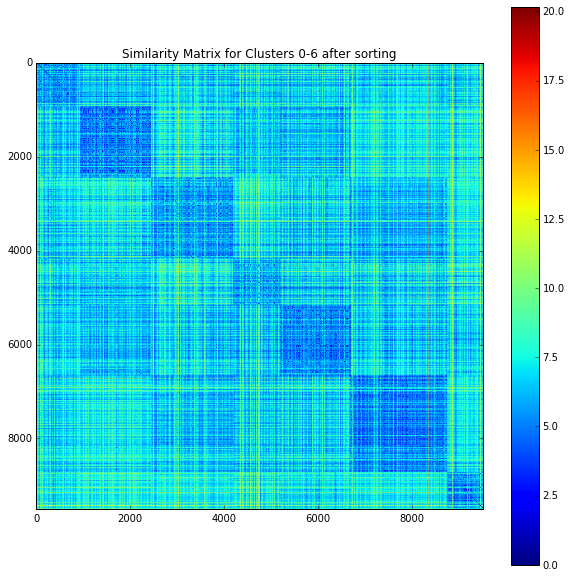

In [29]:
fing_06=fing_sort[clust_sort<7]

dist_06=euclidean_distances(fing_06)

plt.figure(figsize=(10,10))
plt.title("Similarity Matrix for Clusters 0-6 after sorting")
plt.imshow(dist_06)
plt.colorbar()



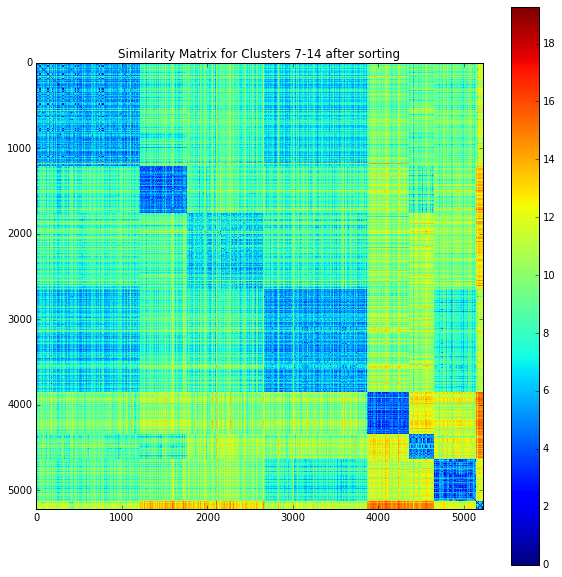

In [30]:
fing_714=fing_sort[clust_sort>6]

dist_714=euclidean_distances(fing_714)

plt.figure(figsize=(10,10))
plt.imshow(dist_714)
plt.title("Similarity Matrix for Clusters 7-14 after sorting")
plt.colorbar()

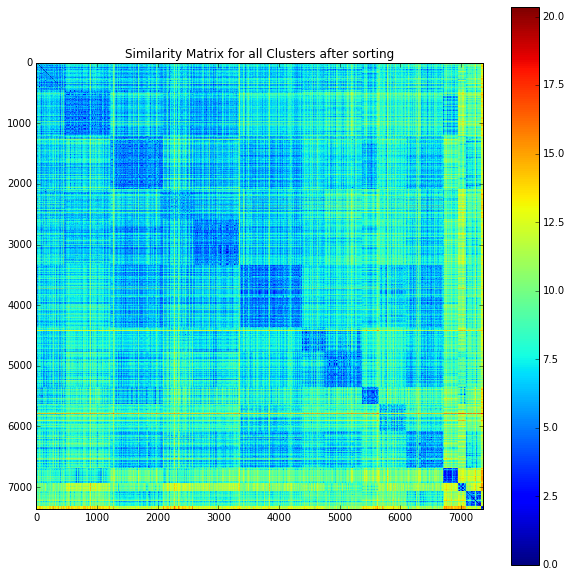

In [37]:
dist_014=euclidean_distances(fing_sort)
plt.figure(figsize=(10,10))
plt.imshow(dist_014[::2,::2])
plt.title("Similarity Matrix for all Clusters after sorting")
plt.colorbar()

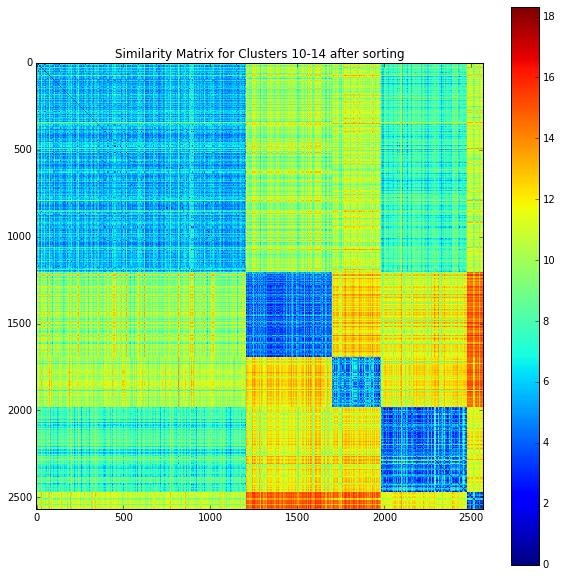

In [31]:
fing_914=fing_sort[clust_sort>9]

dist_914=euclidean_distances(fing_914)

plt.figure(figsize=(10,10))
plt.title("Similarity Matrix for Clusters 10-14 after sorting")
plt.imshow(dist_914)
plt.colorbar()

In [32]:
Df_sorted[Df_sorted["cluster_pca50"]==14]["Formula"]

7097       Si1 Hg1 P2
5771       V1 Fe2 Si1
6726      Ti1 Mn2 Ge1
5805      Mn1 Fe2 Si1
7514       In1 P2 Pb1
6724      Li2 Mg1 Ge1
6723       Mn2 V1 Ge1
6676      Sc2 Mn1 Ge1
6665      Li2 Sn1 Ge1
6646      Mn1 Ge1 Rh2
6623      Li2 Ge1 Pd1
6563      Zn1 Ni2 Ge1
6731      Mg1 Ge1 Rh2
6518      Li2 Zn1 Ge1
6123      Ti1 Fe2 Si1
6517      Mn1 Ni2 Ge1
6092      Ti1 Fe2 Ge1
6733      Yb1 Li2 Ge1
6495      Mn2 Ni2 Ge2
6262      Li2 Ga1 Sb1
6754      Ta1 Mn2 Ge1
490       Ba2 Ag2 Bi2
7748       K2 Rb1 Sb1
1812       Sn2 B1 Se1
1813       Tl1 B1 Te2
1814       Zn1 B1 Se2
1817        K1 Hg2 B1
1818       Hf1 Ge1 B2
1822       Hg2 B1 Cl1
1825       Tl1 B1 Cl2
             ...     
4367      Li2 Cu1 Sb1
8140      Na1 Li2 Sb1
8120       Na1 Li5 N2
8107       Na4 Li2 N2
8063     Li16 Mg8 Si8
4785      Eu1 Li2 Ge1
161       Ba2 Ag2 Sb2
14613     Ti1 Co2 Si1
150       Li2 Ag1 Sb1
3569       Cs1 K2 Sb1
14379     Mn2 Co1 Ge1
14545     Ti1 Co2 Ge1
14527     Mn1 Co2 Ge1
14452     Zn1 Co2 Ge1
14457     

In [75]:
Df_sorted[Df_sorted["cluster_pca50"]==8]["Formula"]

8872      Yb6 Mn6 O18
4599      Er4 Zr4 O14
7531      Ta2 In6 O14
12233       La2 C2 O2
7645        K4 U4 O14
4573       Er4 V4 O14
9351      Zr14 N4 O22
4566      Er4 Ti4 O14
9350        Zr7 N4 O8
11004       Y2 Ti2 O6
6295      Sm6 Ga2 O12
7465      Ti4 In8 O20
13202     Ta4 Cd4 O14
4511      Dy6 Ho6 O18
7530     Ta4 In12 O28
4515     Dy6 Sb10 O24
1587        Pr3 B2 N4
6315      Gd6 Nb2 O14
10996       Y6 V6 O18
7551      Pr6 Ir2 O14
7498      In8 Sn6 O24
10982       Y4 W4 O14
7509     In6 Sb10 O24
10950      Y6 Sn6 O18
9300        Ta4 N4 O4
7497     In11 Sb3 O24
7555      Nd6 Ir2 O14
4583      Er4 Sn4 O14
4553      Er6 Mn6 O18
8888      Sc4 Mn4 O14
             ...     
6356      Gd6 Re2 O14
5621        Yb3 S2 F4
10672     Y14 Re2 O28
4498      Dy8 Ti4 O20
2487      Ba2 Zr7 O16
9563       Na4 U4 O14
14119     Pb7 Cl2 F12
9922       Nd4 V4 O14
7164      Ho6 Ta2 O14
10737    Yb6 Sb10 O24
7192      Ho4 Ru4 O14
7166      Ho6 Re2 O14
13464    Ce12 Mo4 O28
7198      Ho4 Zr4 O14
2485      

# Redoing ordering by Hand( Do Not Execute- Non-standard)

In [81]:
sort_args_new=[0, 7,14, 10,13,4,11, 6, 9, 1, 8, 3, 5, 12, 2]

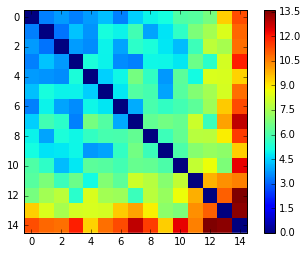

In [82]:
clust_centers=Km_pca50.cluster_centers_
centers_sorted_new=clust_centers[sort_args_new]
plt.imshow(euclidean_distances(centers_sorted_new),interpolation="none")
plt.colorbar()

In [83]:
clusts_sorted=np.zeros(len(clusts),dtype=int)
for i in range(15):
    clusts_sorted[clusts==i]=sort_args_new.index(i)

In [84]:
Df["cluster_pca50"]=clusts_sorted
Df_sorted=Df.sort_values(by="cluster_pca50")
clust_sort=Df_sorted["cluster_pca50"].values
fing_sort=Df_sorted.drop(["cluster_pca50","Formula"],axis=1).values

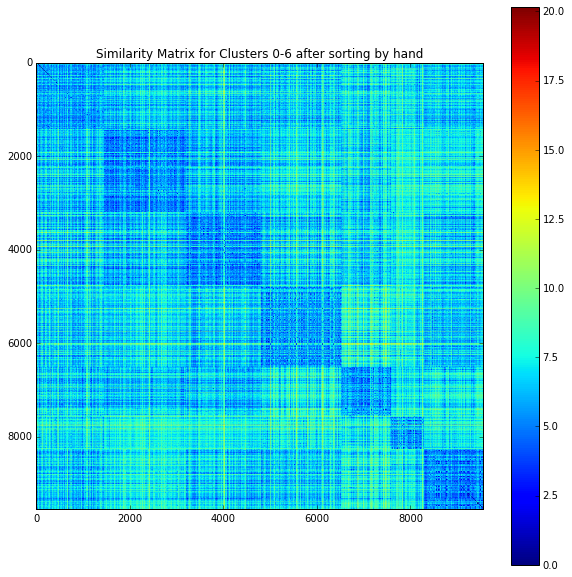

In [85]:
fing_06=fing_sort[clust_sort<7]

dist_06=euclidean_distances(fing_06)

plt.figure(figsize=(10,10))
plt.title("Similarity Matrix for Clusters 0-6 after sorting by hand")
plt.imshow(dist_06)
plt.colorbar()


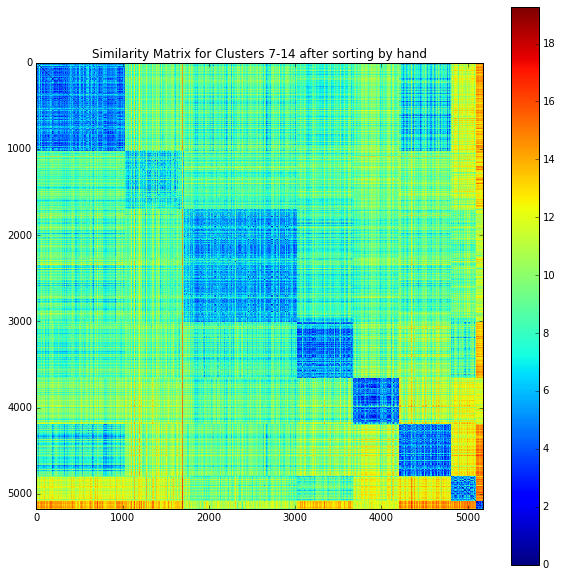

In [86]:
fing_714=fing_sort[clust_sort>6]

dist_714=euclidean_distances(fing_714)

plt.figure(figsize=(10,10))
plt.imshow(dist_714)
plt.title("Similarity Matrix for Clusters 7-14 after sorting by hand")
plt.colorbar()

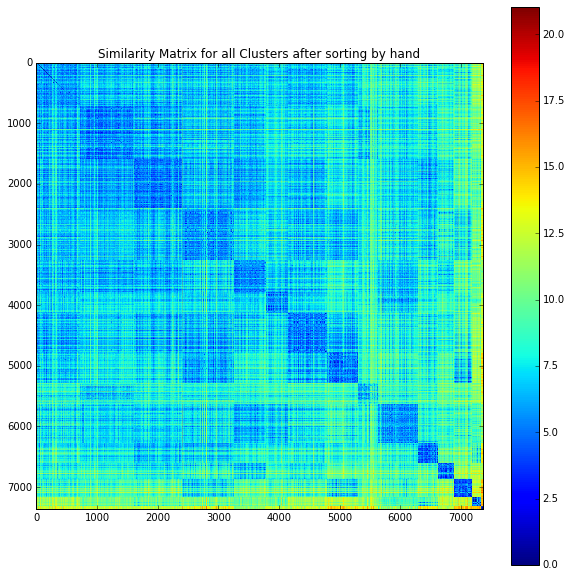

In [87]:
dist_014=euclidean_distances(fing_sort)
plt.figure(figsize=(10,10))
plt.imshow(dist_014[::2,::2])
plt.title("Similarity Matrix for all Clusters after sorting by hand")
plt.colorbar()

# Lets match results with Agglomerative clustering( Re-execute) (Incredibly slow)

In [39]:
from sklearn.cluster import AgglomerativeClustering


In [40]:
Ag=AgglomerativeClustering(n_clusters=15)


In [42]:
pc2=PCA(n_components=10)
pca_fing_sort10=pc2.fit_transform(fing_sort)

In [47]:
import os

In [ ]:
clust_ag=Ag.fit_predict(pca_fing_sort40)

os.system('say "your program has finished"')

In [48]:
Counter(clust_ag)

Counter({0: 585,
         1: 463,
         2: 425,
         3: 516,
         4: 470,
         5: 253,
         6: 234,
         7: 512,
         8: 143,
         9: 262,
         10: 263,
         11: 159,
         12: 292,
         13: 185,
         14: 238})

# Lets refactor these structures into the periodic table

In [3]:
from pymatgen import Composition

In [21]:
Formulas_s=Df_sorted["Formula"].values

In [22]:
clusters_s=Df_sorted["cluster_pca50"].values

In [23]:
Comps_s=[Composition(i) for i in Formulas_s]

In [24]:
Z_max=max([ E.Z for comp in Comps_s for E in comp.elements ])

In [25]:
Z_array= np.array([[E.Z for E in comp.elements] for comp in Comps_s ])

In [113]:
Z_array.shape

(14722, 3)

In [26]:
from itertools import permutations

In [27]:
refactor_array=np.zeros((Z_max,Z_max,Z_max,np.amax(clusters_s)))
for i in tqdm.tqdm_notebook(range(len(clusters_s))):
    for index in set(permutations(Z_array[i])):
        refactor_array[index[0]-1,index[1]-1,index[2]-1][clusters_s[i]-1]+=1
    

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [62]:
refactor_summed=np.sum(refactor_array,axis=3)

In [63]:
refactor_summed[7].shape

(92, 92)

In [83]:
count=0
xarr=np.zeros(8464)
yarr=np.zeros(8464)
zarr=np.zeros(8464)
for (a,b),c in np.ndenumerate(refactor_summed[7]):
    if c>0:
        xarr[count]=a+1
        yarr[count]=b+1
        zarr[count]=c
        count=count+1

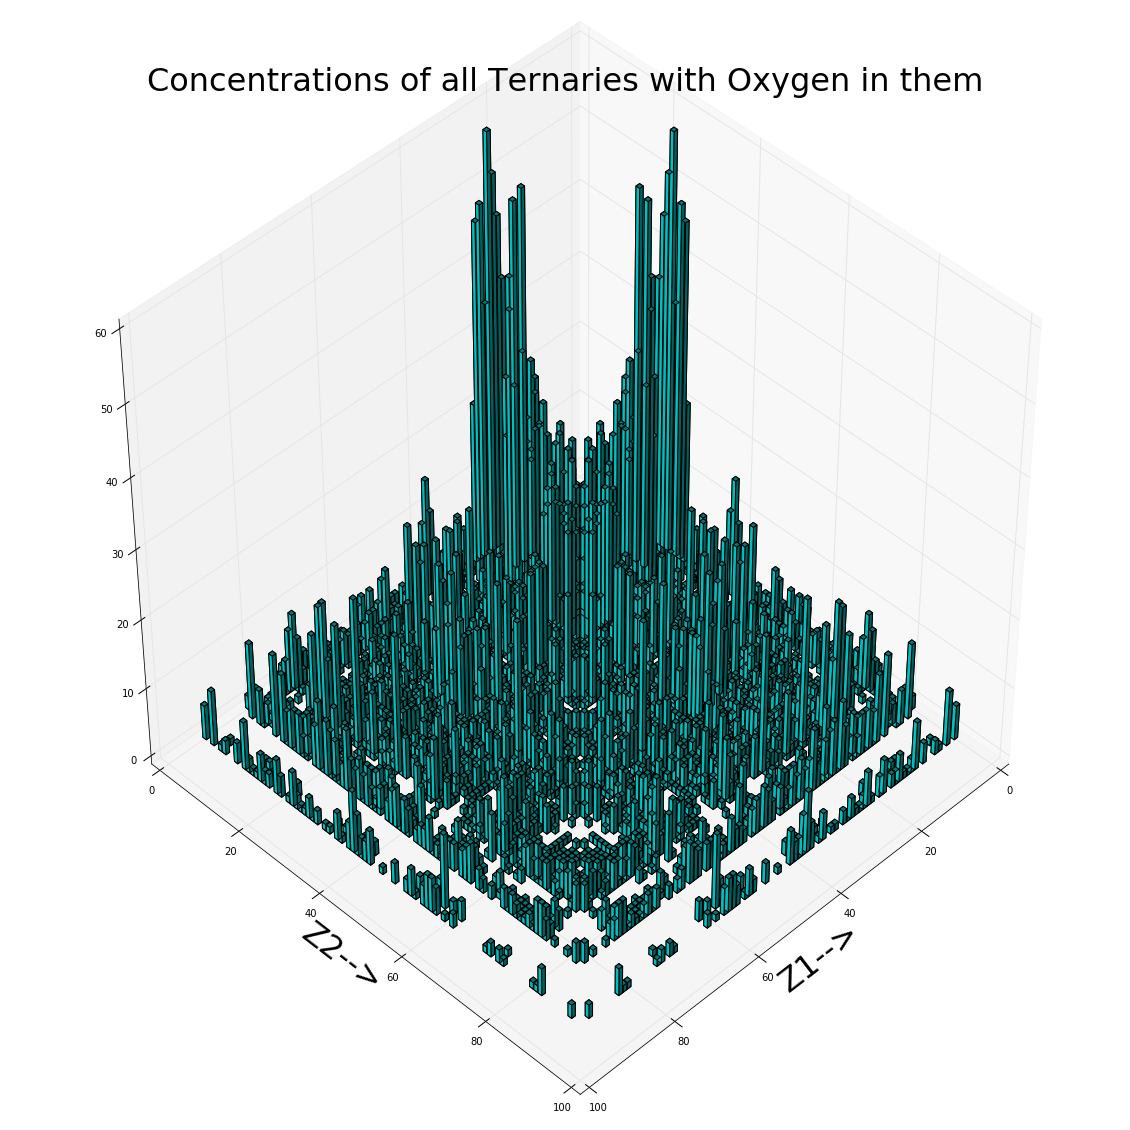

In [84]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 45)
ax.bar3d(xarr[0:count], yarr[0:count],np.zeros(count),0.85,0.85,zarr[0:count], color='c', zsort='average')
plt.title("Concentrations of all Ternaries with Oxygen in them",fontsize=32)
plt.xlabel("Z1-->",fontsize=32)
plt.ylabel("Z2-->",fontsize=32)

In [80]:
np.random.seed(13)
c2_arr=np.random.rand(15,4)
count=0
count8=0
xarr=np.zeros(8464)
yarr=np.zeros(8464)
zarr=np.zeros(8464)
dzarr=np.zeros(8464)
clust_arr=np.zeros((8464,4))
label_arr=np.zeros(8464)
Z_tag=7
for (a,b,c),d in np.ndenumerate(refactor_array[Z_tag]):
    if d>0:
        if c==8:
            count8=count8+1
        xarr[count]=a+1
        yarr[count]=b+1
        zarr[count]=np.sum(refactor_array[Z_tag,a,b,0:c])
        clust_arr[count]=c2_arr[c]
        label_arr[count]=c
        dzarr[count]=d
        count=count+1
xarr=xarr[0:count]
yarr=yarr[0:count]
zarr=zarr[0:count]
dzarr=dzarr[0:count]
clust_arr=clust_arr[0:count]
label_arr=label_arr[0:count]
print count


7800


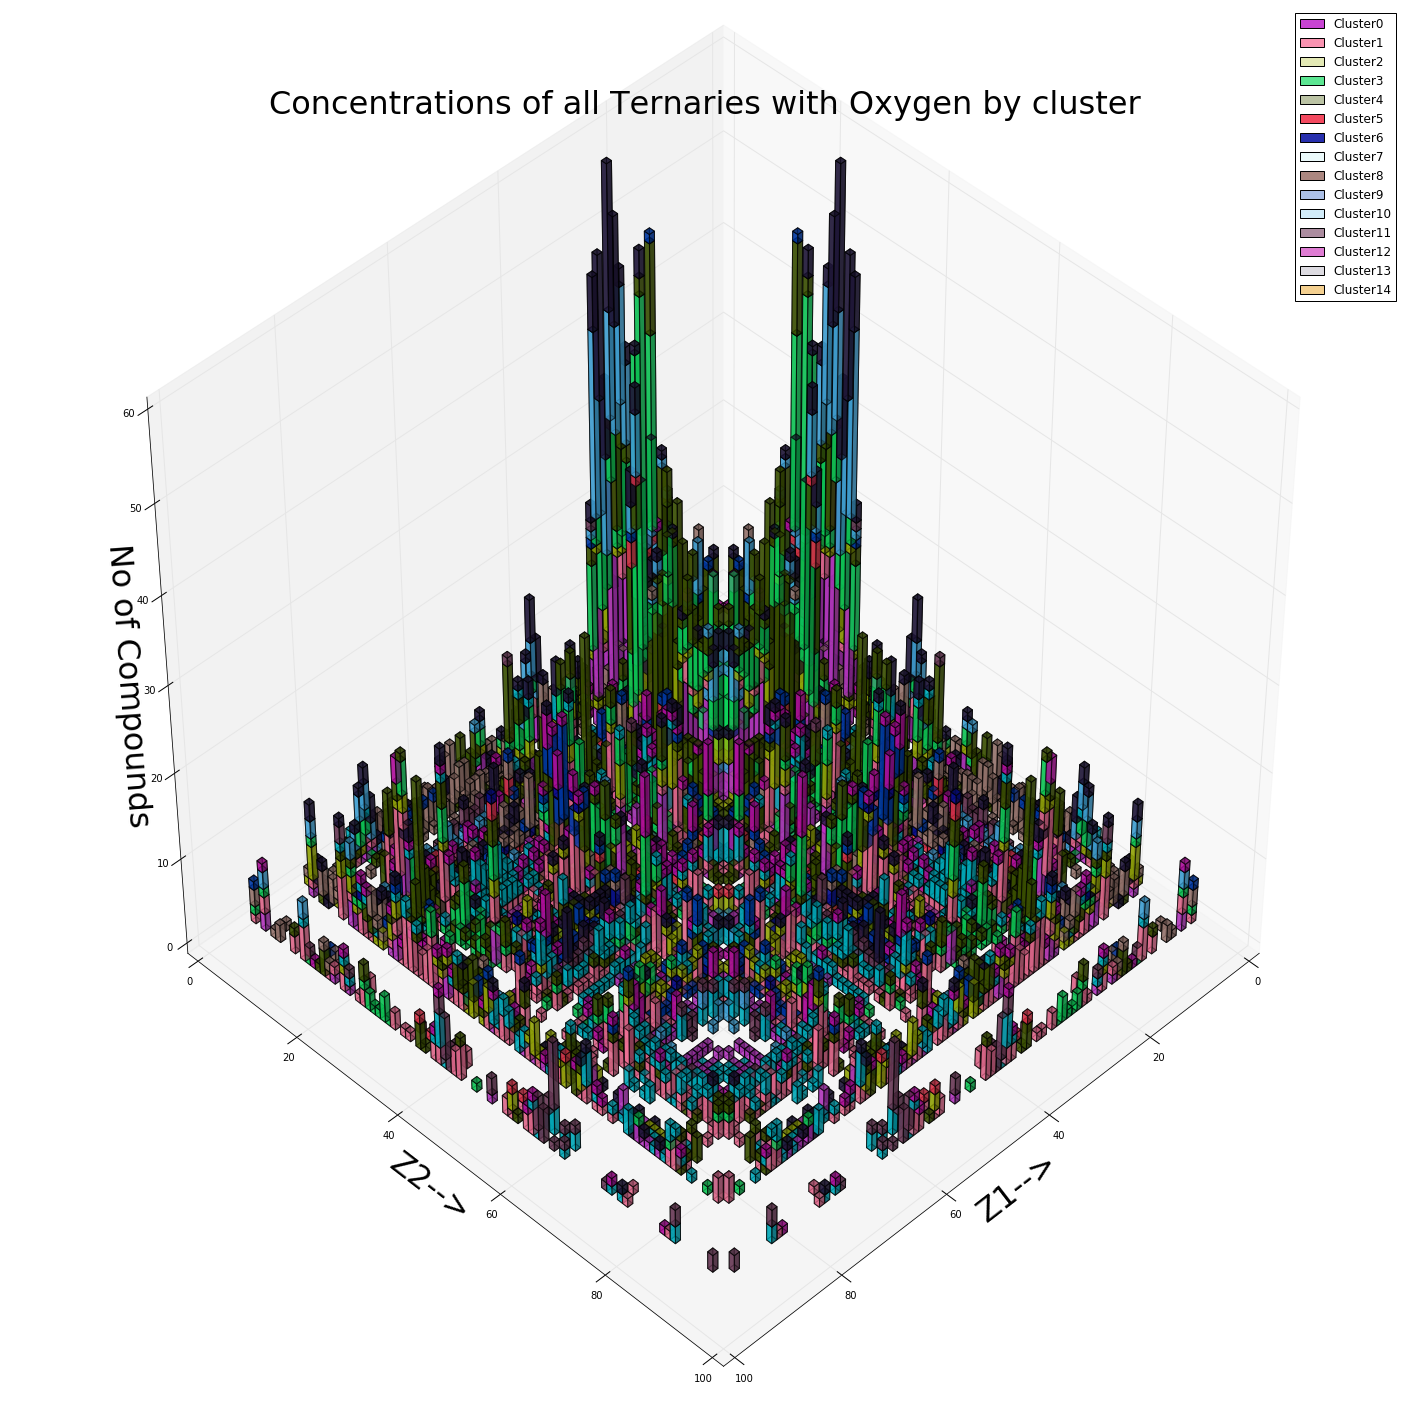

In [82]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 45)
ax.bar3d(xarr, yarr,zarr,0.95,0.95,dzarr,color=clust_arr,zsort='average',alpha=0.7)
plt.title("Concentrations of all Ternaries with Oxygen by cluster",fontsize=32)
ax.set_xlabel("Z1-->",fontsize=32)
ax.set_ylabel("Z2-->",fontsize=32)
ax.set_zlabel("No of Compounds",fontsize=32)
proxies=[plt.Rectangle((0,0),2,2,fc=c2_arr[i]) for i in range(15)]
names=["Cluster"+str(i) for i in range(15)]
ax.legend(proxies,names)

In [42]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [56]:
a=np.array([0,1,2])

In [57]:
a[0:1]

array([0])

In [60]:
Formulas_s[clusters_s==8][0:10]

array(['Yb6 Mn6 O18', 'Er4 Zr4 O14', 'Ta2 In6 O14', 'La2 C2 O2',
       'K4 U4 O14', 'Er4 V4 O14', 'Zr14 N4 O22', 'Er4 Ti4 O14',
       'Zr7 N4 O8', 'Y2 Ti2 O6'], dtype=object)

In [70]:
np.random.seed(13)
c2_arr=np.random.rand(15,4)
count=0
xarr=np.zeros(8464)
yarr=np.zeros(8464)
zarr=np.zeros(8464)
dzarr=np.zeros(8464)
clust_arr=np.zeros((8464,4))
label_arr=np.zeros(8464)
Z_tag=7
for (a,b,c),d in np.ndenumerate(refactor_array[Z_tag]):
    if d>0 and c==8:
        xarr[count]=a+1
        yarr[count]=b+1
        clust_arr[count]=c2_arr[c]
        label_arr[count]=c
        dzarr[count]=d
        count=count+1
xarr=xarr[0:count]
yarr=yarr[0:count]
zarr=zarr[0:count]
dzarr=dzarr[0:count]
clust_arr=clust_arr[0:count]
label_arr=label_arr[0:count]


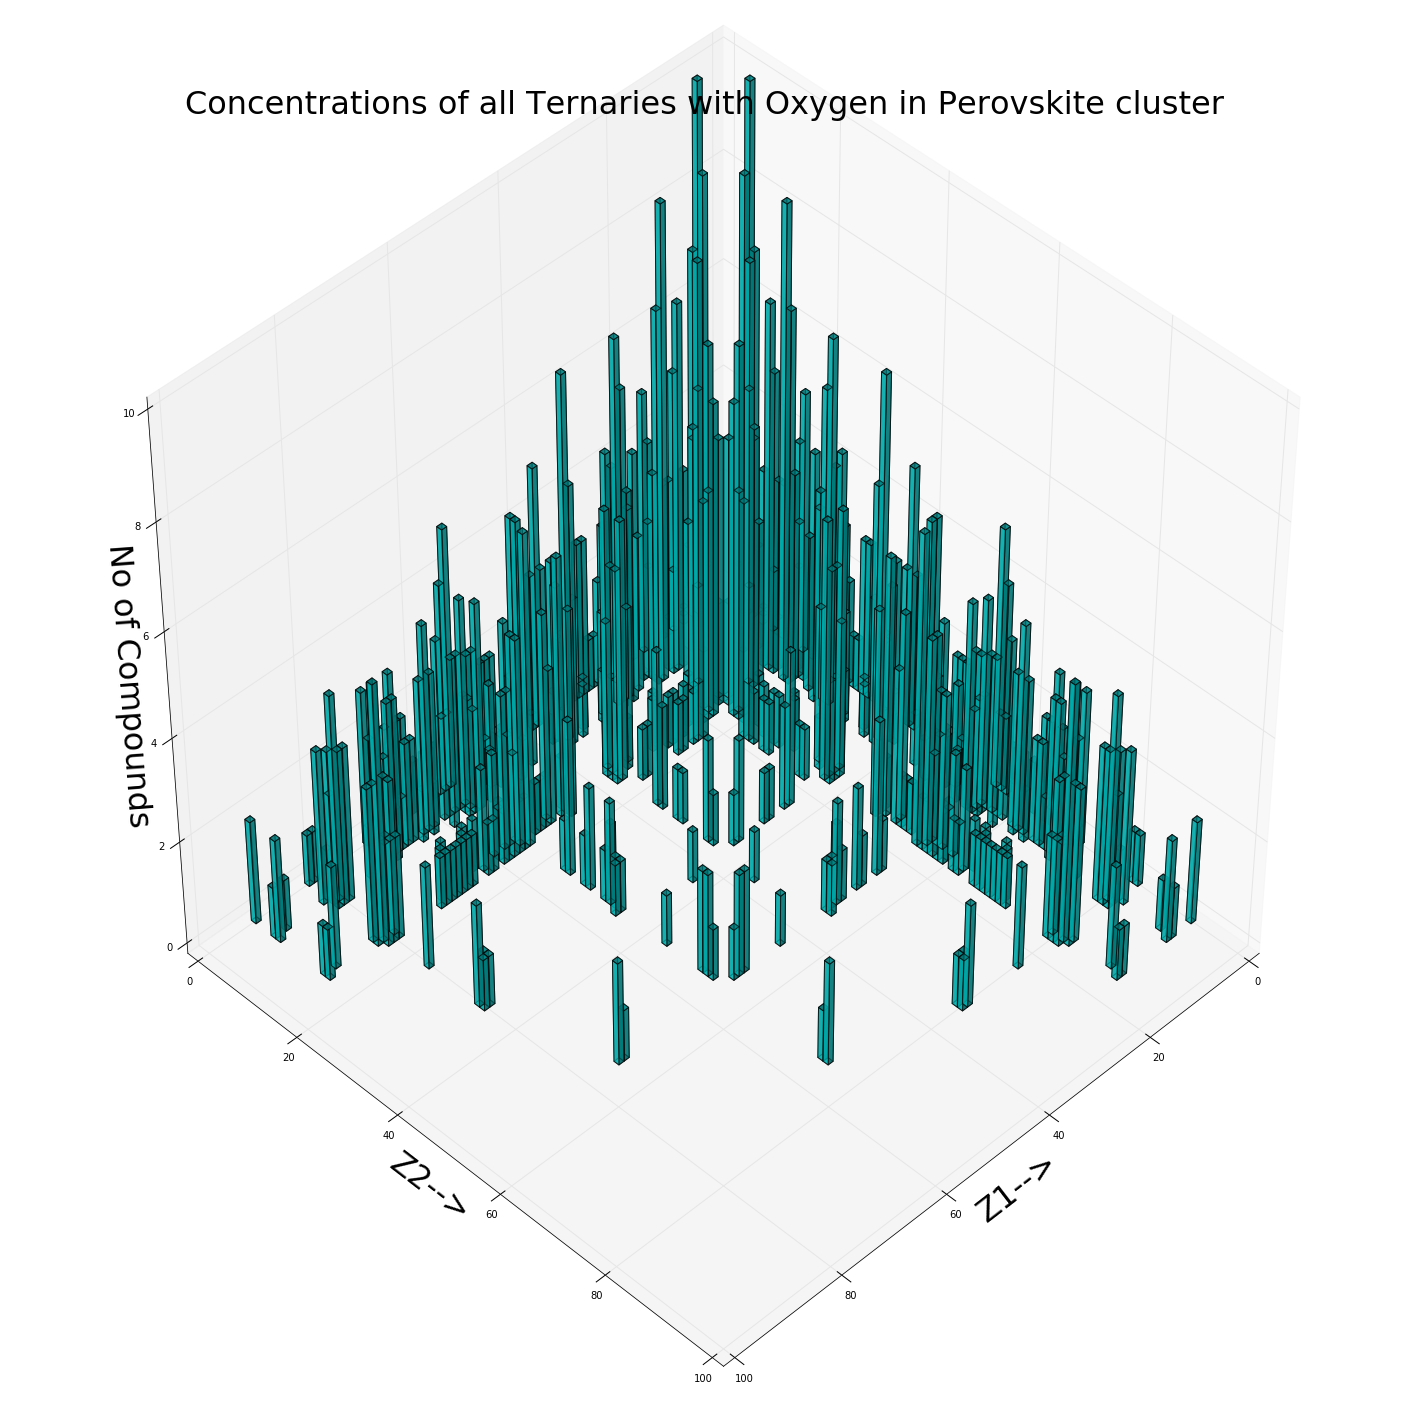

In [78]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 45)
ax.bar3d(xarr, yarr,zarr,0.95,0.95,dzarr,color='c',zsort='average',alpha=0.7)
plt.title("Concentrations of all Ternaries with Oxygen in Perovskite cluster",fontsize=32)
ax.set_xlabel("Z1-->",fontsize=32)
ax.set_ylabel("Z2-->",fontsize=32)
ax.set_zlabel("No of Compounds",fontsize=32)